In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

microdata = pd.read_csv('DADOS/MICRODADOS_ENEM_2021.csv', encoding='latin', sep=';')
microdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [2]:
def calc_raw_score(res, gab):
    raw_score = 0
    for i in range(len(res)):
        if res[i] == gab[i]:
            raw_score += 1
    return raw_score

def extract_raw_score(df, code):
    ac = df[[f'TP_PRESENCA_{code}', f'NU_NOTA_{code}', f'TX_RESPOSTAS_{code}', f'TX_GABARITO_{code}']]
    ac = ac[ac[f'TP_PRESENCA_{code}'] == 1]
    ac[f'NU_ACERTOS_{code}'] = ac.apply(lambda row: calc_raw_score(row[f'TX_RESPOSTAS_{code}'], row[f'TX_GABARITO_{code}']), axis=1)
    return ac

def filter_ac(df, code):
    return df.drop(columns=[f'TP_PRESENCA_{code}', f'TX_RESPOSTAS_{code}', f'TX_GABARITO_{code}'])

ch = filter_ac(extract_raw_score(microdata, 'CH'), 'CH')
cn = filter_ac(extract_raw_score(microdata, 'CN'), 'CN')
lc = filter_ac(extract_raw_score(microdata, 'LC'), 'LC')
mt = filter_ac(extract_raw_score(microdata, 'MT'), 'MT')

def extract_raw_score_stats(df, code):
    rs = pd.DataFrame({
        f'NU_NOTA_MIN_{code}': [],
        f'NU_NOTA_MEAN_{code}': [],
        f'NU_NOTA_MAX_{code}': []
    })
    i_raw_score = f"NU_ACERTOS_{code}"
    i_score = f"NU_NOTA_{code}"
    for i in range(46):
        fdf = df.loc[df[i_raw_score] == i]
        fdf = fdf[i_score]
        rs.loc[i] = [fdf.min(), fdf.mean(), fdf.max()]
    return rs

ch_rs = extract_raw_score_stats(ch, 'CH')
cn_rs = extract_raw_score_stats(cn, 'CN')
lc_rs = extract_raw_score_stats(lc, 'LC')
mt_rs = extract_raw_score_stats(mt, 'MT')

rs = pd.concat([ch_rs, cn_rs, lc_rs, mt_rs], axis=1)
means = rs.filter(like='NU_NOTA_MEAN_')
means

,NU_NOTA_MEAN_CH,NU_NOTA_MEAN_CN,NU_NOTA_MEAN_LC,NU_NOTA_MEAN_MT
0,23.935388,33.428899,17.933752,104.548834
1,334.628193,347.353913,308.371837,361.695756
2,341.812142,353.294295,317.724650,370.101462
3,349.235507,361.224765,328.024832,378.483702
4,357.234765,369.664780,337.828366,388.188703
5,365.686554,377.977390,349.315100,399.046010
6,375.390648,387.294081,360.219471,411.091696
7,386.100437,397.608477,372.751855,424.842229
8,398.045168,408.559825,385.760453,440.334323
9,411.105027,420.427315,399.738725,458.001317


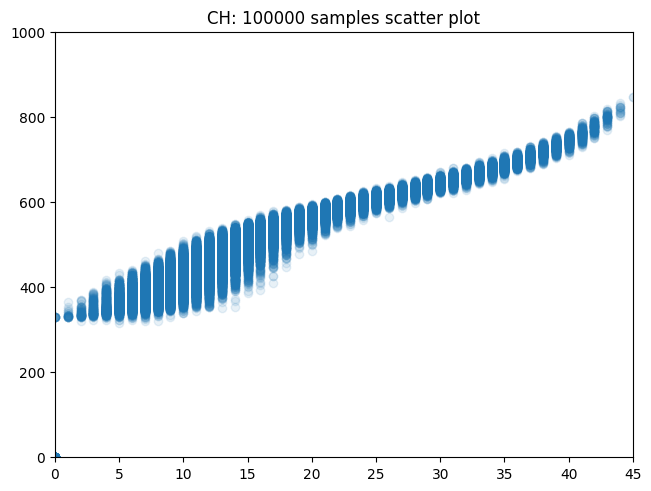

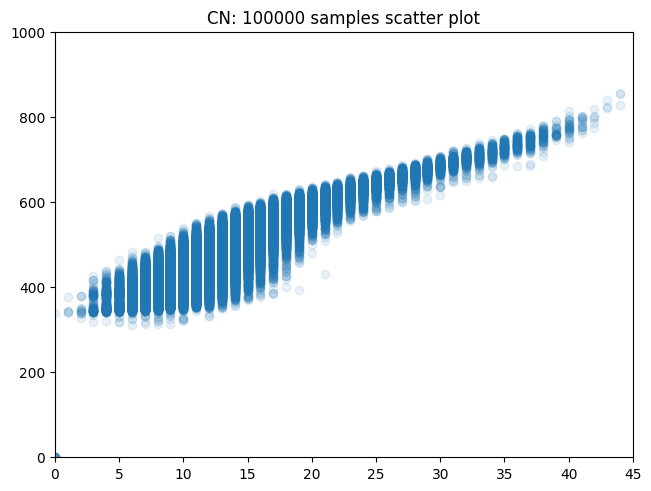

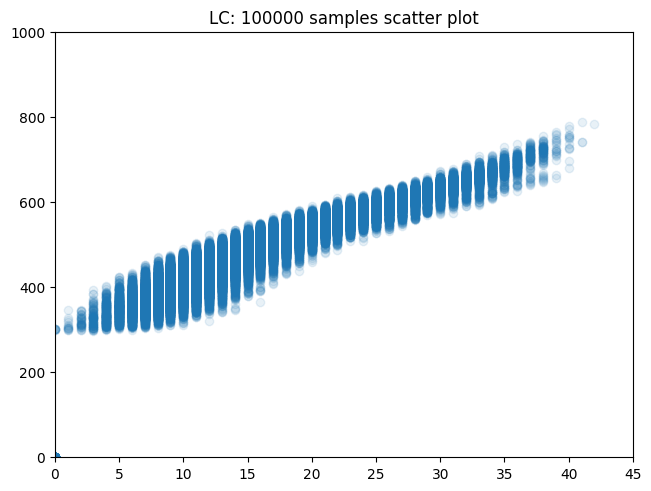

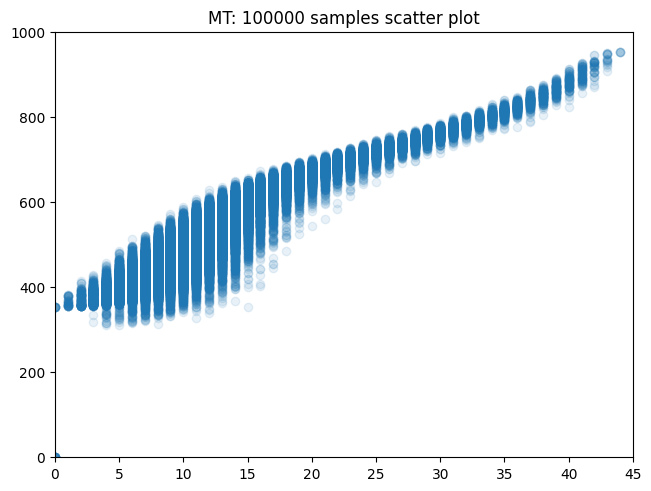

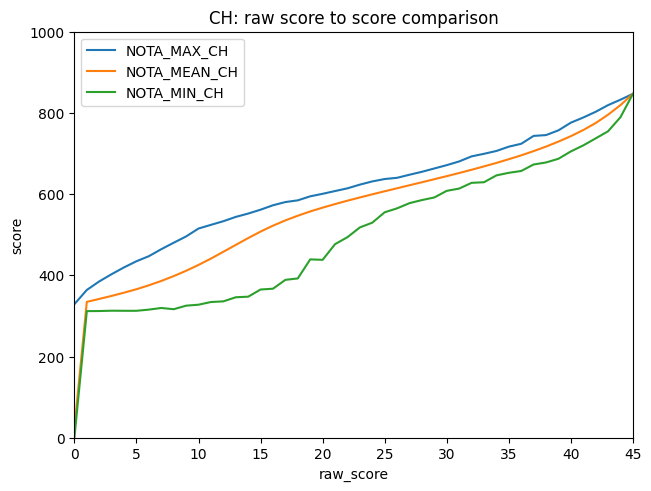

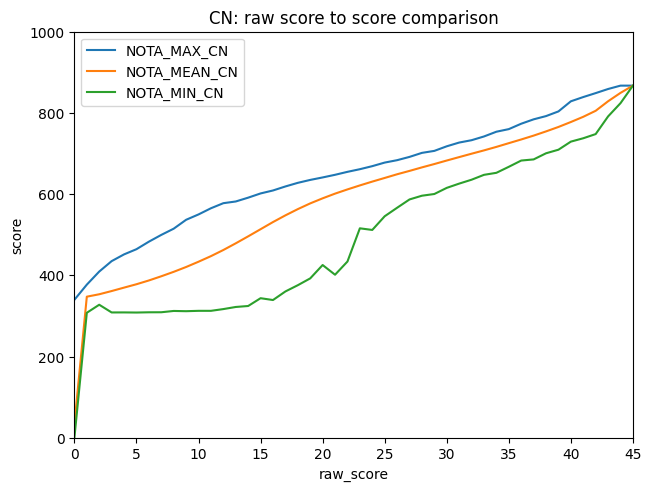

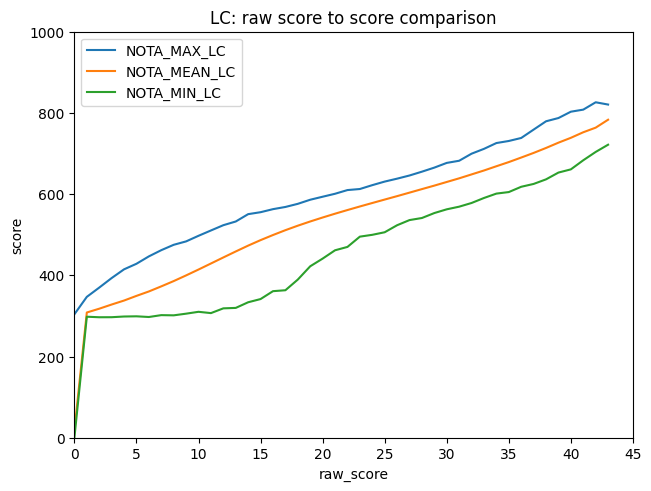

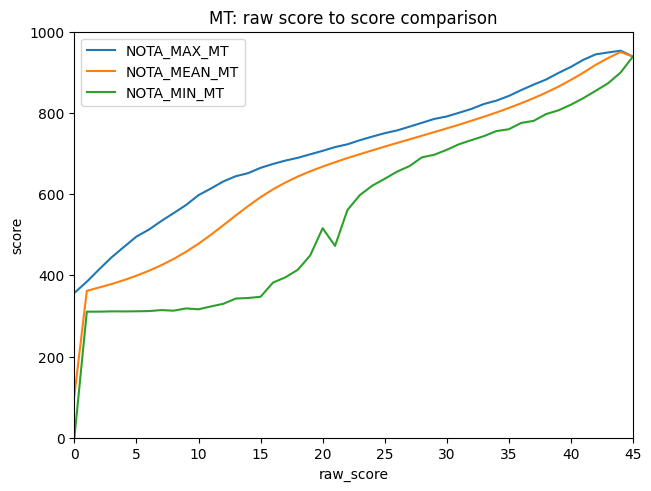

In [17]:
def plot_raw_score_scatter(df, code):
    samples = 100000
    df = df.sample(n=samples)
    fig, ax = plt.subplots(layout='constrained')
    ax.scatter(df[f'NU_ACERTOS_{code}'], df[f'NU_NOTA_{code}'], alpha=0.1)
    ax.set_title(f'{code}: {samples} samples scatter plot')
    ax.axis([0, 45, 0, 1000])
    return fig

def plot_raw_score_stats(df, code):
    fig, ax = plt.subplots(layout='constrained')
    ax.plot(df.index, df[f'NU_NOTA_MAX_{code}'], label=f'NOTA_MAX_{code}')
    ax.plot(df.index, df[f'NU_NOTA_MEAN_{code}'], label=f'NOTA_MEAN_{code}')
    ax.plot(df.index, df[f'NU_NOTA_MIN_{code}'], label=f'NOTA_MIN_{code}')
    ax.set_title(f'{code}: raw score to score comparison')
    ax.set_xlabel('raw_score')
    ax.set_ylabel('score')
    ax.axis([0, 45, 0, 1000])
    ax.legend()
    return fig

ch_scatter = plot_raw_score_scatter(ch, 'CH')
cn_scatter = plot_raw_score_scatter(cn, 'CN')
lc_scatter = plot_raw_score_scatter(lc, 'LC')
mt_scatter = plot_raw_score_scatter(mt, 'MT')


ch_rs_fig = plot_raw_score_stats(ch_rs, 'CH')
cn_rs_fig = plot_raw_score_stats(cn_rs, 'CN')
lc_rs_fig = plot_raw_score_stats(lc_rs, 'LC')
mt_rs_fig = plot_raw_score_stats(mt_rs, 'MT')


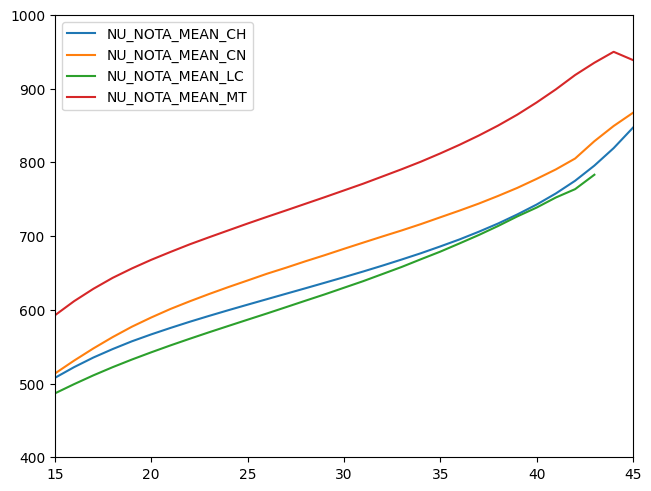

In [18]:
means_fig, means_ax = plt.subplots(layout='constrained')
means_ax.plot(means.index, means['NU_NOTA_MEAN_CH'], label='NU_NOTA_MEAN_CH')
means_ax.plot(means.index, means['NU_NOTA_MEAN_CN'], label='NU_NOTA_MEAN_CN')
means_ax.plot(means.index, means['NU_NOTA_MEAN_LC'], label='NU_NOTA_MEAN_LC')
means_ax.plot(means.index, means['NU_NOTA_MEAN_MT'], label='NU_NOTA_MEAN_MT')
means_ax.axis([15, 45, 400, 1000])
means_ax.legend()

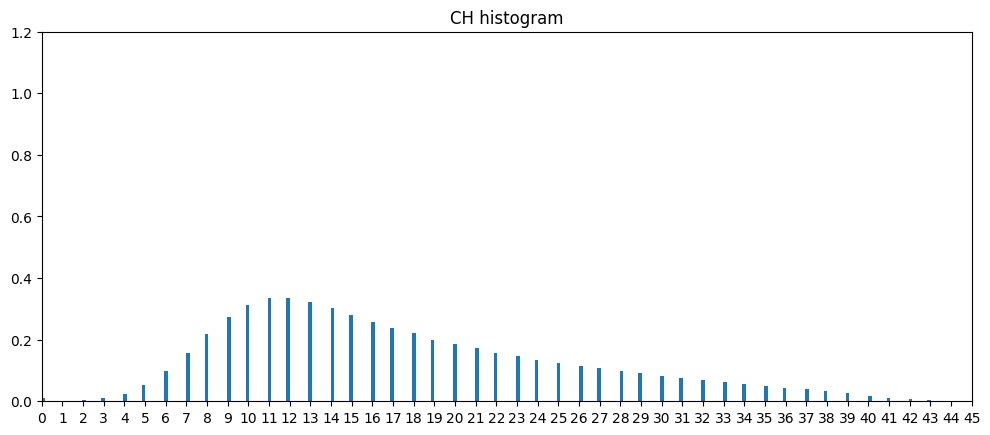

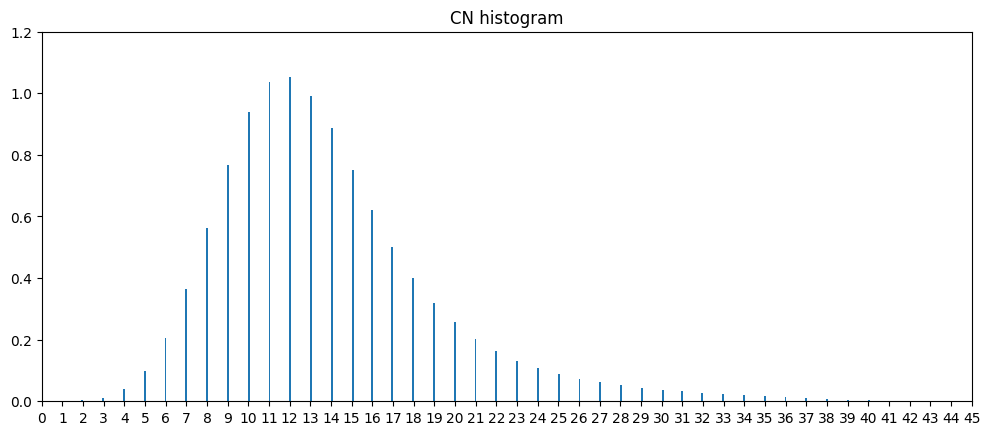

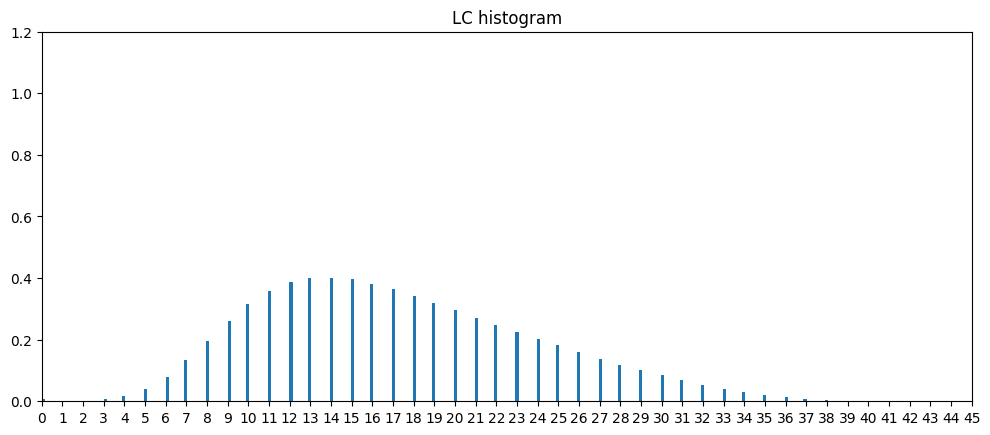

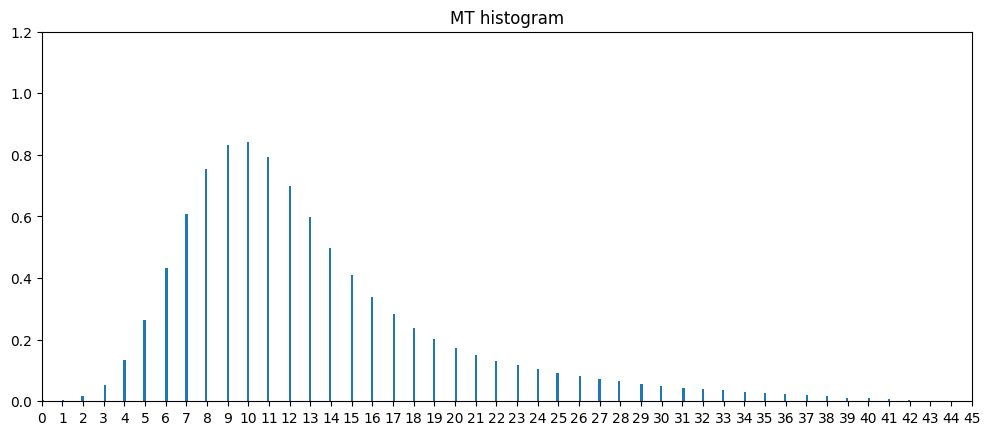

In [34]:
def plot_raw_score_hist(df, code):
    fig, ax = plt.subplots(figsize=[12, 4.8])
    ax.hist(df[f'NU_ACERTOS_{code}'], bins='auto', density=True)
    ax.set_title(f'{code} histogram')
    ax.set_xlim(0, 45)
    ax.set_ylim(0, 1.2)
    ax.set_xticks(range(46))

    return fig

ch_rs_hist = plot_raw_score_hist(ch, 'CH')
cn_rs_hist = plot_raw_score_hist(cn, 'CN')
lc_rs_hist = plot_raw_score_hist(lc, 'LC')
mt_rs_hist = plot_raw_score_hist(mt, 'MT')


In [20]:
def calc_improv(target, red, minnat=15, minhum=15, minlin=15, minmat=15, minmax='MEAN'):
    ch_ser = rs[f'NU_NOTA_{minmax}_CH']
    cn_ser = rs[f'NU_NOTA_{minmax}_CN']
    lc_ser = rs[f'NU_NOTA_{minmax}_LC']
    mt_ser = rs[f'NU_NOTA_{minmax}_MT']

    raw_sum = 180
    rscores = []
    for hum in range(minhum, 46):
        for nat in range(minnat, 46):
            for lin in range(minlin, 46):
                for mat in range(minmat, 46):
                    avg = (ch_ser[hum] + cn_ser[nat] + lc_ser[lin] + mt_ser[mat] + red)/5
                    sum = nat + hum + lin + mat
                    if avg >= target: #and sum <= raw_sum:
                        raw_sum = sum
                        rscores.append((nat, hum, lin, mat, sum, avg))

    scores = pd.DataFrame(data=rscores, columns=['CN', 'CH', 'LC', 'MT', 'SUM', 'NOTA'])
    # Restrict max (counting on 100% is not a good bet)
    scores = scores[scores.MT <= 42]
    scores = scores[scores.CN <= 42]
    scores = scores[scores.CH <= 42]
    scores = scores[scores.LC <= 38]
    scores = scores.sort_values(by=['SUM', 'NOTA'], ascending=[True, False])
    return scores

calc_improv(815, 960, 30, 38, 30, 38)

,CN,CH,LC,MT,SUM,NOTA
3613,42,42,30,42,156,817.667209
3094,34,42,38,42,156,816.638199
3525,41,42,31,42,156,816.504557
3135,35,42,37,42,156,816.027981
2570,42,41,31,42,156,816.017884
...,...,...,...,...,...,...
3658,42,42,37,42,163,831.976208
3569,41,42,38,42,163,831.463654
2612,42,41,38,42,163,830.976981
3665,42,42,38,41,163,830.530929


In [35]:
# save .csv
rs.to_csv('DATA/2021/rs-2021.csv')
ch.to_csv('DATA/2021/ch-2021.csv')
cn.to_csv('DATA/2021/cn-2021.csv')
lc.to_csv('DATA/2021/lc-2021.csv')
mt.to_csv('DATA/2021/mt-2021.csv')

# save figure
means_fig.savefig('DATA/2021/means-2021.png')
ch_rs_fig.savefig('DATA/2021/ch_plt-2021.png')
ch_rs_hist.savefig('DATA/2021/ch_hist-2021.png')
ch_scatter.savefig('DATA/2021/ch_scatter.png')
cn_rs_fig.savefig('DATA/2021/cn_plt-2021.png')
cn_rs_hist.savefig('DATA/2021/cn_hist-2021.png')
cn_scatter.savefig('DATA/2021/cn_scatter-2021.png')
lc_rs_fig.savefig('DATA/2021/lc_plt-2021.png')
lc_rs_hist.savefig('DATA/2021/lc_hist-2021.png')
lc_scatter.savefig('DATA/2021/lc_scatter-2021.png')
mt_rs_fig.savefig('DATA/2021/mt_plt-2021.png')
mt_rs_hist.savefig('DATA/2021/mt_hist-2021.png')
mt_scatter.savefig('DATA/2021/mt_scatter-2021.png')


/home/gustavo/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
